Importing required libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


Definition of constants and required functions

In [19]:
N = 100
X = np.array([10,20,30,40,50,60,70,80,90,100])
Y_0 = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
Y_20 = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
Y_40 = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

# Function to add noise to vectors with a specified percentage
def nois (input, noisn, input_size):
    num_changes = int(input_size * noisn)
    for j in range (len(input)):
        A = input[j]
        for i in range (num_changes):
            random_number = np.random.randint(0, 100) # Generating random numbers to change corresponding component
            if (A[0,i]==1):
                A[0,i]=-1
            else:
                A[0,i]=1
    return input


# Threshold function to convert the final output to binary output
def binary (Matrix):
    for i in range (len(Matrix)):
        for j in range (len(Matrix[0])):
            if (Matrix[i,j]>0):
                Matrix[i,j]=1
            if (Matrix[i,j]<0):
                Matrix[i,j]=-1
    return Matrix

# Function to calculate the percentage of similarity
def error (input, target):
    n=0
    for i in range (len(input)):
        for j in range (len(input[0])):
            if (input[i,j]==target[i,j]):
                n = n+1
    P = n/len(input[0])*100
    return P




In this section, the similarity values for training with different values of "R" are calculated

In [20]:
# Define the list of R values
R_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize parameters

num=0


for R in R_values:
    mean_0=0
    mean_20=0
    mean_40=0
    for x in range(30):
        e_0=0
        e_20=0
        e_40=0

        # Generating and storing random vectors
        random_vectors1 = []
        for _ in range(R):
            random_binary = np.random.randint(0, 2, N)
            random_bipolar = np.where(random_binary == 0, -1, 1)
            random_vectors1.append(random_bipolar)

        
        W1 = np.zeros ((N,N))
        for i in range (R):
            random_vectors1[i]=random_vectors1[i].reshape(1,100)
        
        # Adding noise to vectors
        random_vectors1_20 = deepcopy(random_vectors1)
        random_vectors1_40 = deepcopy(random_vectors1)

        random_vectors1_20 = nois (random_vectors1_20,0.2,100)  # Vectors with 20% noise
        random_vectors1_40 = nois (random_vectors1_40,0.4,100)  # Vectors with 40% noise

    
        # Transposing vectors for training
        random_vectors_T1 = []

        for i in range (R):
            Tranpose=np.transpose(random_vectors1[i])
            random_vectors_T1.append(Tranpose)

        # Training the network
        for i in range (R):
            W1 = W1 + np.matmul(random_vectors_T1[i], random_vectors1[i])
        
            
        # Setting the main diagonal to zero
        for i in range (N):
            for j in range (N):
                if (i==j):
                    W1[i,j]=0
        
        # Calculating error for noise-free data
        for i in range (R):
            Result1 = np.matmul(random_vectors1[i],W1)
            Result1 = binary (Result1)
            e_0 = error (random_vectors1[i],Result1) + e_0
            
        
        # Calculating error for data with 20% noise
        for i in range (R):
            Result2 = np.matmul(random_vectors1_20[i],W1)
            Result2 = binary (Result2)
            e_20 = error (random_vectors1[i],Result2) + e_20
            
        
        # Calculating error for data with 40% noise
        for i in range (R):
            Result3 = np.matmul(random_vectors1_40[i],W1)
            Result3 = binary (Result3)
            e_40 = error (random_vectors1[i],Result3) + e_40


        mean_0 = e_0/R + mean_0 # Average error for noise-free data
        mean_20 = e_20/R + mean_20 # Average error for data with 20% noise
        mean_40 = e_40/R + mean_40 # Average error for data with 40% noise

        
    mean_0 = mean_0/30
    Y_0[num]=mean_0
    mean_20 = mean_20/30
    Y_20[num]=mean_20
    mean_40 = mean_40/30
    Y_40[num]=mean_40

    num=num+1
    print ("For R =",R)
    print ("Average similarity percentage for noise-free data is:" ,mean_0)
    print ("Average similarity percentage for data with 20% noise is::" ,mean_20)
    print ("Average similarity percentage for data with 20% noise is:" ,mean_40)

For R = 10
Average similarity percentage for noise-free data is: 99.96000000000001
Average similarity percentage for data with 20% noise is:: 97.54999999999998
Average similarity percentage for data with 20% noise is: 73.06666666666666
For R = 20
Average similarity percentage for noise-free data is: 98.74833333333335
Average similarity percentage for data with 20% noise is:: 90.97000000000001
Average similarity percentage for data with 20% noise is: 66.10166666666666
For R = 30
Average similarity percentage for noise-free data is: 96.66555555555554
Average similarity percentage for data with 20% noise is:: 86.26777777777777
Average similarity percentage for data with 20% noise is: 63.435555555555545
For R = 40
Average similarity percentage for noise-free data is: 94.33083333333335
Average similarity percentage for data with 20% noise is:: 82.44
Average similarity percentage for data with 20% noise is: 61.94333333333332
For R = 50
Average similarity percentage for noise-free data is: 91

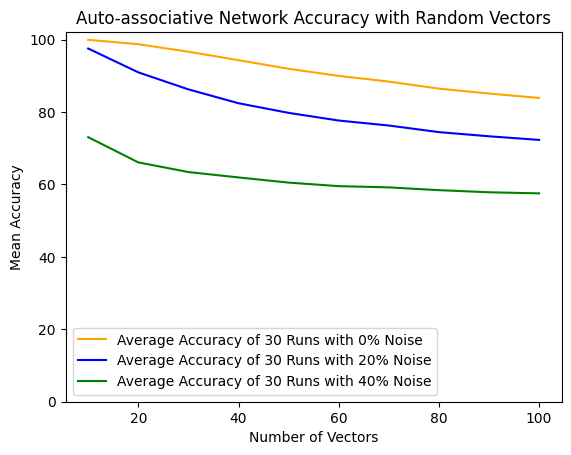

In [21]:
plt.plot(X, Y_0, color='orange', label='Average Accuracy of 30 Runs with 0% Noise')
plt.plot(X, Y_20, color='blue', label='Average Accuracy of 30 Runs with 20% Noise')
plt.plot(X, Y_40, color='green', label='Average Accuracy of 30 Runs with 40% Noise')

plt.xlabel('Number of Vectors')
plt.ylabel('Mean Accuracy')
plt.title('Auto-associative Network Accuracy with Random Vectors')
plt.ylim(0)  
plt.legend()
plt.show()